- [Task A - Pre Processing](#Task-A---Pre-Processing) 
 - [Mapping categorial data into numeric data](#Mapping-categorial-data-into-numeric-data)
 - [Rank features](#Rank-features)
 - [Dimension reduction](#Dimension-reduction)

In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
df_bankNotes = pd.read_excel('file://localhost/home/armando/Desktop/ECT/5ºAno/ED/ED-Data-Mining/data_banknote_authentication.xlsx')

df_bankNotes

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


## Task A - Pre Processing
### Mapping categorial data into numeric data

##### Banknote Dataset

In [3]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

##### Nursery Dataset

### Rank features
#### 1. Model Based Ranking
We can fit a classfier to each feature and rank the predictive power. This method selects the most powerful features individually but ignores the predictive power when features are combined.

Random Forest Classifier is used in this case because it is robust, nonlinear, and doesn't require scaling.



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = df_bankNotes['class']

X = df_bankNotes.drop('class', axis = 1)
y = data

clf = RandomForestClassifier(n_estimators = 50, max_depth = 4)

scores = []
num_features = len(X.columns)
for i in range(num_features):
    col = X.columns[i]
    score = np.mean(cross_val_score(clf, X[col].values.reshape(-1,1), y, cv=10))
    scores.append((int(score*100), col))

print(sorted(scores, reverse = True))

[(84, 'variance of Wavelet Transformed image'), (76, 'skewness of Wavelet Transformed image'), (67, 'curtosis of Wavelet Transformed image'), (56, 'entropy of image')]


#### 2. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** if there are negative values
##### 2.1 Mutual Info Classif

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test.fit(X, y)


SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f39f4df3620>)

In [6]:
scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.37849155687141045, 'variance of Wavelet Transformed image'), (0.2277866189205613, 'skewness of Wavelet Transformed image'), (0.1217867250422755, 'curtosis of Wavelet Transformed image'), (0.017899257269627045, 'entropy of image')]


### Dimension reduction

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_bankNotes[['class']]], axis = 1)
finalDf

,principal component 1,principal component 2,class
0,-8.117954,-2.372615,0
1,-7.800124,-2.689555,0
2,3.690195,-4.372720,0
3,-9.908612,-0.978030,0
4,6.957545,-0.733813,0
5,-10.067304,-1.846547,0
6,-1.441275,-3.225253,0
7,10.812967,-1.770845,0
8,-4.597883,-2.112941,0
9,-7.985529,-0.276277,0


In [8]:
import matplotlib.pyplot as plt
targets = ['0', '1']
color = ['r', 'g']

targets = ['0', '1']
print(type(int(targets[0])))

finalDf.dtypes

#for target, color in zip(targets,colors):
    #indicesToKeep = finalDf['class'] == target
    #plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
     #          , finalDf.loc[indicesToKeep, 'principal component 2']
      #         , c = color
       #        , s = 50)

<class 'int'>


principal component 1    float64
principal component 2    float64
class                      int64
dtype: object

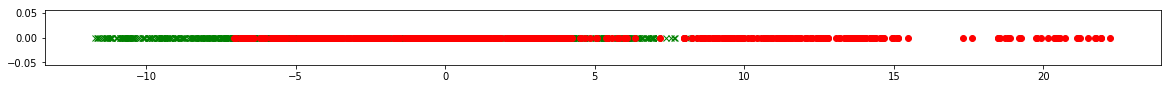

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,1))

for i in range(0,len(finalDf)):
    if finalDf.iloc[i]['class'] == 0:
        plt.plot(finalDf.iloc[i]['principal component 1'],0,'x',c = 'g')
    else:
        plt.plot(finalDf.iloc[i]['principal component 1'],0,'o',c = 'r')
plt.show()

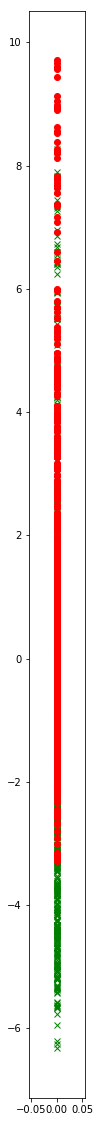

In [27]:
plt.figure(figsize = (1,20))

for i in range(0,len(finalDf)):
    if finalDf.iloc[i]['class'] == 0:
        plt.plot(0,finalDf.iloc[i]['principal component 2'],'x',c = 'g')
    else:
        plt.plot(0,finalDf.iloc[i]['principal component 2'],'o',c = 'r')
plt.show()

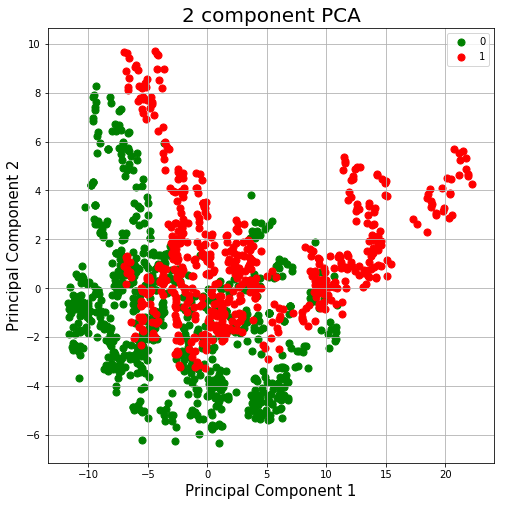

In [10]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == int(target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()